In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [12]:
X_train

array([[ 3.7],
       [ 1.3],
       [ 2.9],
       [ 4. ],
       [ 4.5],
       [ 3.2],
       [ 3. ],
       [ 9. ],
       [ 5.3],
       [10.3],
       [ 7.1],
       [ 8.7],
       [ 4.1],
       [ 6. ],
       [ 5.9],
       [ 9.6],
       [ 4. ],
       [ 9.5],
       [10.5],
       [ 5.1],
       [ 1.1]])

In [13]:
y_train

array([ 57189.,  46205.,  56642.,  56957.,  61111.,  64445.,  60150.,
       105582.,  83088., 122391.,  98273., 109431.,  57081.,  93940.,
        81363., 112635.,  55794., 116969., 121872.,  66029.,  39343.])

In [14]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
pred=regression.predict(X_test)

In [16]:
pred

array([ 57184.85747352,  89669.13605883,  46356.76461175, 102301.91106423,
        48161.44675538,  41845.05925268,  72524.65569436,  99594.88784879,
        63501.24497622])

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test,pred)

0.9583561282144057

### House Price Prediction

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [40]:
train=pd.read_csv('House_Price_Train.csv')
test=pd.read_csv('House_Price_Test.csv')

In [41]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [42]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [43]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

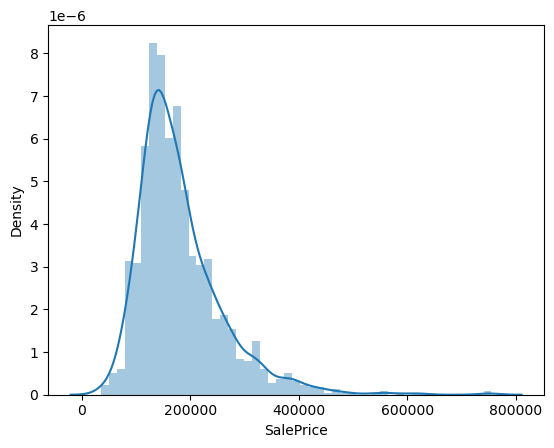

In [44]:
sns.distplot(train['SalePrice'])

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

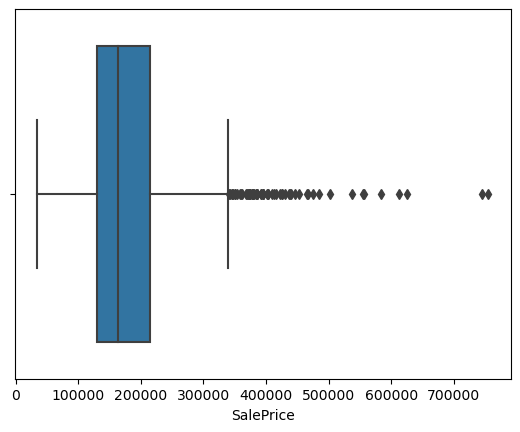

In [45]:
sns.boxplot(train['SalePrice'])

In [46]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [47]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [48]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [49]:
corrmat=train.corr()

In [50]:
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [51]:
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index

In [52]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

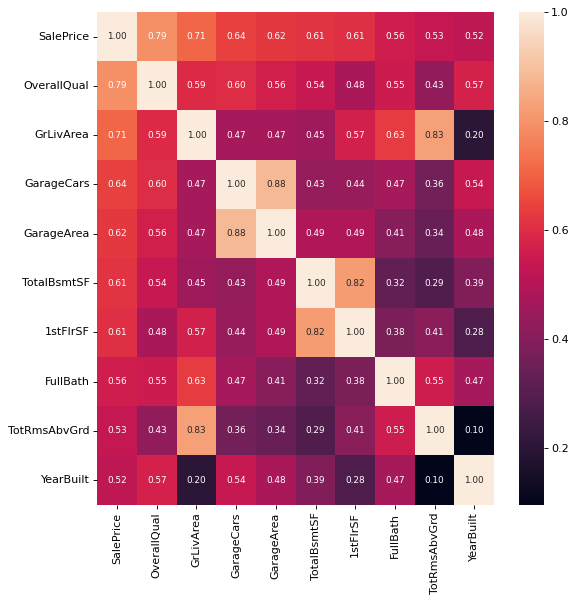

In [53]:
cm=np.corrcoef(train[cols].values.T)
plt.figure(figsize=(8,8),dpi=80)
sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',annot_kws={'size':8},yticklabels=cols.to_list(),xticklabels=cols.to_list())
plt.show()

### Observations
* All 9 variables are impo for salePrice
* However some of them are correlated
* grlivarea and totrmsabvgrd are correlated
* garagecars and garagearea are correlated
* totalbsmtsf and 1stflrsf are correlated

In [56]:
train_num_data=train[cols]
test_num_data=test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [57]:
train_num_data.drop(['TotalBsmtSF','GarageCars','TotalBsmtSF'],axis=1,inplace=True)
test_num_data.drop(['TotalBsmtSF','GarageCars','TotalBsmtSF'],axis=1,inplace=True)

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
train_num_data

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,548,856,2,8,2003
1,181500,6,1262,460,1262,2,6,1976
2,223500,7,1786,608,920,2,6,2001
3,140000,7,1717,642,961,1,7,1915
4,250000,8,2198,836,1145,2,9,2000
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,7,1999
1456,210000,6,2073,500,2073,2,7,1978
1457,266500,7,2340,252,1188,2,9,1941
1458,142125,5,1078,240,1078,1,5,1950


In [59]:
test_num_data

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,730.0,896,1,5,1961
1,6,1329,312.0,1329,1,6,1958
2,5,1629,482.0,928,2,6,1997
3,6,1604,470.0,926,2,7,1998
4,8,1280,506.0,1280,2,5,1992
...,...,...,...,...,...,...,...
1454,4,1092,0.0,546,1,5,1970
1455,4,1092,286.0,546,1,6,1970
1456,5,1224,576.0,1224,1,7,1960
1457,5,970,0.0,970,1,6,1992


In [61]:
train_cat=train.select_dtypes(include='object')
test_cat=test.select_dtypes(include='object')

In [62]:
test_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [63]:
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [64]:
train_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [65]:
test_cat.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [66]:
train_cat.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1,inplace=True)
test_cat.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1,inplace=True)

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
train_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [68]:
train_cat.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [70]:
for col in train_cat.columns:
    train_cat[col].fillna(train_cat[col].mode()[0],inplace=True)
    test_cat[col].fillna(test_cat[col].mode()[0],inplace=True)

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [71]:
train_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [72]:
test_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [73]:
col_name=[]
count_of_uniques=[]
for i in train_cat.columns:
    col_name.append(i)
    count_of_uniques.append(len(set(train_cat[i])))

In [75]:
cat_col_unique=pd.DataFrame()
cat_col_unique['Column']=col_name
cat_col_unique['No of Unique Values']=count_of_uniques

In [76]:
cat_col_unique

,Column,No of Unique Values
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [78]:
set(train['MSZoning'])

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

In [84]:
drop_list=cat_col_unique[cat_col_unique['No of Unique Values']>5]['Column'].tolist()

In [85]:
train_cat.drop(drop_list,axis=1,inplace=True)
test_cat.drop(drop_list,axis=1,inplace=True)

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
train_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,MasVnrType,ExterQual,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,BrkFace,Gd,...,TA,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,1Fam,None,TA,...,TA,Gd,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,BrkFace,Gd,...,TA,Mn,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,None,TA,...,Gd,No,Gd,Y,SBrkr,Gd,Unf,TA,TA,Y
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,1Fam,BrkFace,Gd,...,TA,Av,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,None,TA,...,TA,No,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Stone,TA,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,None,Ex,...,Gd,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,None,TA,...,TA,Mn,Gd,Y,FuseA,Gd,Unf,TA,TA,Y


In [87]:
test_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,MasVnrType,ExterQual,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,None,TA,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,BrkFace,TA,...,TA,No,TA,Y,SBrkr,Gd,Unf,TA,TA,Y
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,None,TA,...,TA,No,Gd,Y,SBrkr,TA,Fin,TA,TA,Y
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,BrkFace,TA,...,TA,No,Ex,Y,SBrkr,Gd,Fin,TA,TA,Y
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,TwnhsE,None,Gd,...,TA,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Twnhs,None,TA,...,TA,No,Gd,Y,SBrkr,TA,Unf,TA,TA,Y
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,TwnhsE,None,TA,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,None,TA,...,TA,No,Ex,Y,SBrkr,TA,Unf,TA,TA,Y
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,None,TA,...,TA,Av,TA,Y,SBrkr,TA,Unf,TA,TA,Y


In [88]:
test_num_data

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,730.0,896,1,5,1961
1,6,1329,312.0,1329,1,6,1958
2,5,1629,482.0,928,2,6,1997
3,6,1604,470.0,926,2,7,1998
4,8,1280,506.0,1280,2,5,1992
...,...,...,...,...,...,...,...
1454,4,1092,0.0,546,1,5,1970
1455,4,1092,286.0,546,1,6,1970
1456,5,1224,576.0,1224,1,7,1960
1457,5,970,0.0,970,1,6,1992


In [89]:
test=pd.concat([test_num_data,test_cat],axis=1)

In [90]:
test

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,MSZoning,Street,LotShape,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,5,896,730.0,896,1,5,1961,RH,Pave,Reg,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1,6,1329,312.0,1329,1,6,1958,RL,Pave,IR1,...,TA,No,TA,Y,SBrkr,Gd,Unf,TA,TA,Y
2,5,1629,482.0,928,2,6,1997,RL,Pave,IR1,...,TA,No,Gd,Y,SBrkr,TA,Fin,TA,TA,Y
3,6,1604,470.0,926,2,7,1998,RL,Pave,IR1,...,TA,No,Ex,Y,SBrkr,Gd,Fin,TA,TA,Y
4,8,1280,506.0,1280,2,5,1992,RL,Pave,IR1,...,TA,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,546,1,5,1970,RM,Pave,Reg,...,TA,No,Gd,Y,SBrkr,TA,Unf,TA,TA,Y
1455,4,1092,286.0,546,1,6,1970,RM,Pave,Reg,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1456,5,1224,576.0,1224,1,7,1960,RL,Pave,Reg,...,TA,No,Ex,Y,SBrkr,TA,Unf,TA,TA,Y
1457,5,970,0.0,970,1,6,1992,RL,Pave,Reg,...,TA,Av,TA,Y,SBrkr,TA,Unf,TA,TA,Y


In [109]:
train=pd.concat([train_num_data,train_cat],axis=1)

In [110]:
train_num_data.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [111]:
train_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive'],
      dtype='object')

In [112]:
train

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,MSZoning,Street,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,208500,7,1710,548,856,2,8,2003,RL,Pave,...,TA,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1,181500,6,1262,460,1262,2,6,1976,RL,Pave,...,TA,Gd,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
2,223500,7,1786,608,920,2,6,2001,RL,Pave,...,TA,Mn,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
3,140000,7,1717,642,961,1,7,1915,RL,Pave,...,Gd,No,Gd,Y,SBrkr,Gd,Unf,TA,TA,Y
4,250000,8,2198,836,1145,2,9,2000,RL,Pave,...,TA,Av,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,7,1999,RL,Pave,...,TA,No,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
1456,210000,6,2073,500,2073,2,7,1978,RL,Pave,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1457,266500,7,2340,252,1188,2,9,1941,RL,Pave,...,Gd,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1458,142125,5,1078,240,1078,1,5,1950,RL,Pave,...,TA,Mn,Gd,Y,FuseA,Gd,Unf,TA,TA,Y


In [113]:
train.drop('YearBuilt',axis=1,inplace=True)
test.drop('YearBuilt',axis=1,inplace=True)

KeyError: "['YearBuilt'] not found in axis"

In [114]:
train

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,208500,7,1710,548,856,2,8,RL,Pave,Reg,...,TA,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1,181500,6,1262,460,1262,2,6,RL,Pave,Reg,...,TA,Gd,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
2,223500,7,1786,608,920,2,6,RL,Pave,IR1,...,TA,Mn,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
3,140000,7,1717,642,961,1,7,RL,Pave,IR1,...,Gd,No,Gd,Y,SBrkr,Gd,Unf,TA,TA,Y
4,250000,8,2198,836,1145,2,9,RL,Pave,IR1,...,TA,Av,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,7,RL,Pave,Reg,...,TA,No,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
1456,210000,6,2073,500,2073,2,7,RL,Pave,Reg,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1457,266500,7,2340,252,1188,2,9,RL,Pave,Reg,...,Gd,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1458,142125,5,1078,240,1078,1,5,RL,Pave,Reg,...,TA,Mn,Gd,Y,FuseA,Gd,Unf,TA,TA,Y


In [115]:
num_col=['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd']

In [116]:
for i in num_col:
    scaler=StandardScaler()
    scaler.fit(train[[i]])
    train[i]=scaler.transform(train[[i]])
    test[i]=scaler.transform(test[[i]])

In [117]:
scaler=StandardScaler()
scaler.fit(train[['SalePrice']])
train['SalePrice']=scaler.transform(train[['SalePrice']])

In [118]:
train

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,0.347273,0.651479,0.370333,0.351000,-0.793434,0.789741,0.912210,RL,Pave,Reg,...,TA,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1,0.007288,-0.071836,-0.482512,-0.060731,0.257140,0.789741,-0.318683,RL,Pave,Reg,...,TA,Gd,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
2,0.536154,0.651479,0.515013,0.631726,-0.627826,0.789741,-0.318683,RL,Pave,IR1,...,TA,Mn,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
3,-0.515281,0.651479,0.383659,0.790804,-0.521734,-1.026041,0.296763,RL,Pave,IR1,...,Gd,No,Gd,Y,SBrkr,Gd,Unf,TA,TA,Y
4,0.869843,1.374795,1.299326,1.698485,-0.045611,0.789741,1.527656,RL,Pave,IR1,...,TA,Av,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.074560,-0.071836,0.250402,-0.060731,-0.542435,0.789741,0.296763,RL,Pave,Reg,...,TA,No,Ex,Y,SBrkr,TA,RFn,TA,TA,Y
1456,0.366161,-0.071836,1.061367,0.126420,2.355701,0.789741,0.296763,RL,Pave,Reg,...,TA,No,TA,Y,SBrkr,TA,Unf,TA,TA,Y
1457,1.077611,0.651479,1.569647,-1.033914,0.065656,0.789741,1.527656,RL,Pave,Reg,...,Gd,No,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y
1458,-0.488523,-0.795151,-0.832788,-1.090059,-0.218982,-1.026041,-0.934130,RL,Pave,Reg,...,TA,Mn,Gd,Y,FuseA,Gd,Unf,TA,TA,Y


In [119]:
scaler.inverse_transform(train[['SalePrice']])

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [120]:
cat_col=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive']

In [121]:
from sklearn import preprocessing
for i in cat_col:
    le=preprocessing.LabelEncoder()
    le.fit(train[[i]])
    train[i]=le.transform(train[[i]])
    test[i]=le.transform(test[[i]])

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
train

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,0.347273,0.651479,0.370333,0.351000,-0.793434,0.789741,0.912210,3,1,3,...,3,3,0,1,4,2,1,4,4,2
1,0.007288,-0.071836,-0.482512,-0.060731,0.257140,0.789741,-0.318683,3,1,3,...,3,1,0,1,4,3,1,4,4,2
2,0.536154,0.651479,0.515013,0.631726,-0.627826,0.789741,-0.318683,3,1,0,...,3,2,0,1,4,2,1,4,4,2
3,-0.515281,0.651479,0.383659,0.790804,-0.521734,-1.026041,0.296763,3,1,0,...,1,3,2,1,4,2,2,4,4,2
4,0.869843,1.374795,1.299326,1.698485,-0.045611,0.789741,1.527656,3,1,0,...,3,0,0,1,4,2,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.074560,-0.071836,0.250402,-0.060731,-0.542435,0.789741,0.296763,3,1,3,...,3,3,0,1,4,3,1,4,4,2
1456,0.366161,-0.071836,1.061367,0.126420,2.355701,0.789741,0.296763,3,1,3,...,3,3,4,1,4,3,2,4,4,2
1457,1.077611,0.651479,1.569647,-1.033914,0.065656,0.789741,1.527656,3,1,3,...,1,3,0,1,4,2,1,4,4,2
1458,-0.488523,-0.795151,-0.832788,-1.090059,-0.218982,-1.026041,-0.934130,3,1,3,...,3,2,2,1,0,2,2,4,4,2


In [123]:
X=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [124]:
X

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,LandContour,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,0.651479,0.370333,0.351000,-0.793434,0.789741,0.912210,3,1,3,3,...,3,3,0,1,4,2,1,4,4,2
1,-0.071836,-0.482512,-0.060731,0.257140,0.789741,-0.318683,3,1,3,3,...,3,1,0,1,4,3,1,4,4,2
2,0.651479,0.515013,0.631726,-0.627826,0.789741,-0.318683,3,1,0,3,...,3,2,0,1,4,2,1,4,4,2
3,0.651479,0.383659,0.790804,-0.521734,-1.026041,0.296763,3,1,0,3,...,1,3,2,1,4,2,2,4,4,2
4,1.374795,1.299326,1.698485,-0.045611,0.789741,1.527656,3,1,0,3,...,3,0,0,1,4,2,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.250402,-0.060731,-0.542435,0.789741,0.296763,3,1,3,3,...,3,3,0,1,4,3,1,4,4,2
1456,-0.071836,1.061367,0.126420,2.355701,0.789741,0.296763,3,1,3,3,...,3,3,4,1,4,3,2,4,4,2
1457,0.651479,1.569647,-1.033914,0.065656,0.789741,1.527656,3,1,3,3,...,1,3,0,1,4,2,1,4,4,2
1458,-0.795151,-0.832788,-1.090059,-0.218982,-1.026041,-0.934130,3,1,3,3,...,3,2,2,1,0,2,2,4,4,2


In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [126]:
X_train

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,LandContour,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
966,-0.795151,-0.394943,-1.015199,-0.482919,-1.026041,0.296763,3,1,0,1,...,0,3,0,1,4,3,2,4,4,2
285,0.651479,-0.505356,0.257425,-1.391174,0.789741,-0.934130,1,1,0,3,...,3,3,0,1,4,2,1,4,4,2
216,0.651479,-0.151273,0.051559,0.707387,0.789741,0.912210,3,1,3,3,...,3,2,0,1,4,2,2,4,4,2
922,-0.071836,-0.379714,-0.355493,0.396872,0.789741,-0.318683,3,1,3,3,...,3,3,0,1,4,2,0,4,4,2
42,-0.795151,-1.202100,0.145135,-0.720980,-1.026041,-0.934130,3,1,0,3,...,3,0,2,1,4,2,1,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-0.795151,0.160929,-0.720437,1.131756,-1.026041,-0.318683,3,1,0,3,...,3,1,4,1,4,3,1,4,4,2
414,0.651479,1.107055,0.959240,-0.213807,0.789741,1.527656,3,1,1,3,...,3,3,0,1,4,2,2,4,4,2
300,-0.795151,-0.341640,-0.458426,0.448624,-1.026041,-0.934130,3,1,3,3,...,3,2,4,1,4,3,2,4,4,2
1251,0.651479,-0.210287,0.023487,0.627170,0.789741,-0.318683,3,1,0,3,...,3,3,0,1,4,2,1,4,4,2


In [127]:
y_train

966    -0.263440
285    -0.204258
216     0.366161
922    -0.137646
42     -0.464913
          ...   
28      0.334681
414     0.592818
300    -0.301216
1251   -0.115484
6       1.587588
Name: SalePrice, Length: 1022, dtype: float64

### Modeling

In [128]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [140]:
pred=model.predict(X_test)

In [141]:
pred

array([ 2.66956611e-01,  1.04859556e+00, -4.63804235e-02, -9.37719204e-01,
        1.14461337e+00,  4.69425245e-03, -3.00501936e-01,  1.72468944e-01,
       -6.73645025e-01, -4.35749578e-01, -8.45423621e-01, -1.43777365e+00,
       -7.59794063e-01,  2.07756727e-01,  1.95818686e-01, -7.29434825e-01,
        1.28570924e-01, -5.83099701e-01, -3.74985141e-01,  5.70555910e-01,
        1.45574017e+00, -2.40251158e-01, -7.28575329e-01,  3.11291578e-01,
       -6.11091565e-01, -6.91565525e-01,  9.18881330e-01, -7.65613889e-01,
       -1.28147298e+00,  1.05563651e+00,  1.77670238e+00, -3.66112064e-02,
       -2.13041237e-01, -8.69893402e-01, -1.19418032e+00,  6.55989132e-01,
       -3.62565323e-01, -5.26284300e-01,  7.52737837e-01, -5.54080329e-01,
       -2.33913727e-01,  7.87252739e-01,  5.41599917e-01, -2.03348810e-01,
       -8.63984566e-02, -6.93747214e-01, -8.77723426e-01, -6.73109860e-01,
       -1.71770892e-01,  4.75617609e-01, -6.98410119e-01, -6.25279176e-01,
        9.18213295e-01, -

In [142]:
pred=scaler.inverse_transform([pred])

In [143]:
pred

array([[202121.63309469, 264195.71868735, 177237.88101641,
        106451.95157208, 271821.00037132, 181293.99131909,
        157056.74691736, 194617.86743121, 127423.47957244,
        146316.01593526, 113781.6322562 ,  66739.98203918,
        120581.92863805, 197420.25702554, 196472.1940249 ,
        122992.91633007, 191131.69338168, 134614.16295002,
        151141.64145757, 226232.06001568, 296529.2265786 ,
        161841.58002607, 123061.17349614, 205642.50740704,
        132391.18092068, 126000.3178853 , 253894.42493054,
        120119.74543846,  79152.64508894, 264754.87717226,
        322018.53392882, 178013.70624511, 164002.46390158,
        111838.35747072,  86085.01700639, 233016.76431965,
        152127.96490748, 139126.17461765, 240700.09094115,
        136918.74481484, 162344.86895907, 243441.10195491,
        223932.51135943, 164772.19080104, 174059.83724098,
        125827.05836311, 111216.53384285, 127465.97989341,
        167279.96034681, 218692.5071573 , 125456.7524339

In [144]:
actual_sales=scaler.inverse_transform([y_test])

In [145]:
actual_sales

array([[177000., 266000., 173900., 100000., 287090., 180000., 100000.,
        183200., 120000., 152000., 141000.,  84500., 127500., 224000.,
        195400.,  93000., 130000., 120000., 119000., 240000., 242000.,
        153500., 130000., 200000., 119000., 109000., 265900., 113000.,
        106500., 250000., 325000., 155000., 152000., 137000.,  84500.,
        178400., 135000., 176000., 235000., 159000., 155000., 222000.,
        230000., 165000., 178000., 134000., 122000., 149900., 177000.,
        252678., 118964., 144000., 277000., 159500., 147000., 275000.,
        274725., 112000., 189950., 100000., 125000., 186700., 151000.,
        119900., 171500., 179500., 200624., 189000., 137000., 306000.,
        170000., 194500., 139000., 186500., 261500., 147000., 129500.,
        151400., 168500., 135960., 192140., 117000., 139400., 184000.,
        150900., 340000., 125000., 127500., 198900., 173500., 132000.,
        176000., 144152., 139000., 127500., 210000., 119000., 120500.,
      

In [151]:
r2_score(actual_sales[0],pred[0])

0.7903705822516928

In [152]:
import statsmodels.api as sm
from scipy import stats
x2=sm.add_constant(X_train)
est=sm.OLS(y_train,x2)
es2=est.fit()

In [153]:
es2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:40:07   Log-Likelihood:                -558.12
No. Observations:                1022   AIC:                             1174.
Df Residuals:                     993   BIC:                             1317.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0214      0.284     -0.075      0.940      -0.578       0.536
OverallQual      0.2754      0.023     11.807      0.000       0.230       0.321
GrLivArea        0.3182      0.030     10.593      0.000       0.259       0.377
GarageArea       0.0743      0.018      4.062      0.000       0.038       0.110
1stFlrSF         0.0915      0.017      5.288      0.000       0.058       0.125
FullBath        -0.0100      0.019     -0.528      0.598      -0.047       0.027
TotRmsAbvGrd    -0.0159      0.025     -0.633      0.527      -0.065       0.033
MSZoning        -0.0242      0.023     -1.038      0.299      -0.070       0.022
Street           0.4366      0.230      1.900      0.058      -0.014       0.888
LotShape        -0.0300      0.010     -2.902      0.004      -0.050      -0.010
LandContour      0.0601      0.021      2.825      0.005       0.018       0.102
Utilities       -0.4011      0.430     -0.933      0.351      -1.244       0.442
LotConfig       -0.0013      0.009     -0.146      0.884      -0.018       0.016
LandSlope        0.2385      0.053      4.471      0.000       0.134       0.343
BldgType        -0.0623      0.012     -5.135      0.000      -0.086      -0.039
MasVnrType       0.0276      0.022      1.250      0.212      -0.016       0.071
ExterQual       -0.1167      0.030     -3.841      0.000      -0.176      -0.057
ExterCond       -0.0141      0.019     -0.735      0.462      -0.052       0.024
BsmtQual        -0.1210      0.022     -5.590      0.000      -0.163      -0.078
BsmtCond         0.0471      0.021      2.229      0.026       0.006       0.089
BsmtExposure    -0.0397      0.013     -3.106      0.002      -0.065      -0.015
HeatingQC       -0.0032      0.009     -0.352      0.725      -0.021       0.015
CentralAir       0.1518      0.062      2.464      0.014       0.031       0.273
Electrical       0.0198      0.014      1.416      0.157      -0.008       0.047
KitchenQual     -0.1283      0.023     -5.458      0.000      -0.174      -0.082
GarageFinish    -0.0623      0.022     -2.888      0.004      -0.105      -0.020
GarageQual       0.0136      0.025      0.533      0.594      -0.036       0.064
GarageCond       0.0375      0.032      1.167      0.243      -0.026       0.101
PavedDrive       0.0393      0.030      1.320      0.187      -0.019       0.098
==============================================================================
Omnibus:                      501.714   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57083.715
Skew:                          -1.253   Prob(JB):                         0.00
Kurtosis:                      39.527   Cond. No.                         373.
==============================================================================

Notes:
[1] Stand

In [176]:
X_train.drop(['FullBath','TotRmsAbvGrd','MSZoning','Utilities','LotConfig','MasVnrType','ExterCond','HeatingQC','Electrical','GarageQual','GarageCond','PavedDrive'],axis=1,inplace=True)
X_test.drop(['FullBath','TotRmsAbvGrd','MSZoning','Utilities','LotConfig','MasVnrType','ExterCond','HeatingQC','Electrical','GarageQual','GarageCond','PavedDrive'],axis=1,inplace=True)

In [155]:
test.drop(['FullBath','TotRmsAbvGrd','MSZoning','Utilities','LotConfig','MasVnrType','ExterCond','HeatingQC','Electrical','GarageQual','GarageCond','PavedDrive'],axis=1,inplace=True)

In [156]:
X_train

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,LandContour,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
966,-0.795151,-0.394943,-1.015199,-0.482919,-1.026041,0.296763,3,1,0,1,...,0,3,0,1,4,3,2,4,4,2
285,0.651479,-0.505356,0.257425,-1.391174,0.789741,-0.934130,1,1,0,3,...,3,3,0,1,4,2,1,4,4,2
216,0.651479,-0.151273,0.051559,0.707387,0.789741,0.912210,3,1,3,3,...,3,2,0,1,4,2,2,4,4,2
922,-0.071836,-0.379714,-0.355493,0.396872,0.789741,-0.318683,3,1,3,3,...,3,3,0,1,4,2,0,4,4,2
42,-0.795151,-1.202100,0.145135,-0.720980,-1.026041,-0.934130,3,1,0,3,...,3,0,2,1,4,2,1,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-0.795151,0.160929,-0.720437,1.131756,-1.026041,-0.318683,3,1,0,3,...,3,1,4,1,4,3,1,4,4,2
414,0.651479,1.107055,0.959240,-0.213807,0.789741,1.527656,3,1,1,3,...,3,3,0,1,4,2,2,4,4,2
300,-0.795151,-0.341640,-0.458426,0.448624,-1.026041,-0.934130,3,1,3,3,...,3,2,4,1,4,3,2,4,4,2
1251,0.651479,-0.210287,0.023487,0.627170,0.789741,-0.318683,3,1,0,3,...,3,3,0,1,4,2,1,4,4,2


In [175]:
X_train

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,Street,LotShape,LandContour,...,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
966,-0.795151,-0.394943,-1.015199,-0.482919,-1.026041,0.296763,3,1,0,1,...,0,3,0,1,4,3,2,4,4,2
285,0.651479,-0.505356,0.257425,-1.391174,0.789741,-0.934130,1,1,0,3,...,3,3,0,1,4,2,1,4,4,2
216,0.651479,-0.151273,0.051559,0.707387,0.789741,0.912210,3,1,3,3,...,3,2,0,1,4,2,2,4,4,2
922,-0.071836,-0.379714,-0.355493,0.396872,0.789741,-0.318683,3,1,3,3,...,3,3,0,1,4,2,0,4,4,2
42,-0.795151,-1.202100,0.145135,-0.720980,-1.026041,-0.934130,3,1,0,3,...,3,0,2,1,4,2,1,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-0.795151,0.160929,-0.720437,1.131756,-1.026041,-0.318683,3,1,0,3,...,3,1,4,1,4,3,1,4,4,2
414,0.651479,1.107055,0.959240,-0.213807,0.789741,1.527656,3,1,1,3,...,3,3,0,1,4,2,2,4,4,2
300,-0.795151,-0.341640,-0.458426,0.448624,-1.026041,-0.934130,3,1,3,3,...,3,2,4,1,4,3,2,4,4,2
1251,0.651479,-0.210287,0.023487,0.627170,0.789741,-0.318683,3,1,0,3,...,3,3,0,1,4,2,1,4,4,2


### Modeling

In [177]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [178]:
pred=model.predict(X_test)

In [179]:
pred

array([ 2.54711552e-01,  1.02075592e+00, -6.91316876e-02, -9.31415943e-01,
        1.13572194e+00,  3.42208519e-02, -3.14648354e-01,  1.70362531e-01,
       -6.88722807e-01, -4.37787516e-01, -8.62135378e-01, -1.46291576e+00,
       -7.62560126e-01,  1.92834061e-01,  2.31116235e-01, -7.67425226e-01,
        1.10600457e-01, -5.97586328e-01, -3.27793963e-01,  5.96831368e-01,
        1.42516625e+00, -2.46173219e-01, -7.31017576e-01,  3.22473158e-01,
       -5.60454153e-01, -7.54014201e-01,  9.43253037e-01, -6.37105639e-01,
       -1.34365850e+00,  1.10089061e+00,  1.77893942e+00, -8.36861999e-02,
       -1.88978574e-01, -8.66678744e-01, -1.21873884e+00,  6.53688909e-01,
       -3.24975263e-01, -5.65902124e-01,  7.67204073e-01, -5.79292723e-01,
       -2.58161448e-01,  7.96194075e-01,  5.17353010e-01, -1.70240617e-01,
       -1.03554778e-01, -7.54230074e-01, -8.97753723e-01, -6.45810167e-01,
       -2.19830011e-01,  4.05166054e-01, -7.42154056e-01, -6.70404997e-01,
        9.35999282e-01, -

In [180]:
pred=scaler.inverse_transform([pred])

In [181]:
pred

array([[201149.18816953, 261984.8256163 , 175431.08274153,
        106952.52690379, 271114.88564936, 183638.85483132,
        155933.30505377, 194450.58604222, 126226.07311349,
        146154.17254686, 112454.4632156 ,  64743.31407785,
        120362.26087633, 196235.16911903, 199275.35915008,
        119975.8975497 , 189704.5634575 , 133463.70320162,
        154889.34263457, 228318.73316924, 294101.18962647,
        161371.27786105, 122867.22168678, 206530.49586837,
        136412.56577471, 121040.93802474, 255829.91113572,
        130325.26558632,  74214.16419653, 268348.74537833,
        322196.18941732, 174275.23189662, 165913.40729358,
        112093.65047503,  84134.6949507 , 232834.09139846,
        155113.19050104, 135979.91355746, 241848.93131599,
        134916.49520771, 160419.22910766, 244151.18077501,
        222006.93615696, 167401.48759542, 172697.36299527,
        121023.79444939, 109625.82190773, 129633.99300426,
        163463.33139113, 213097.57636712, 121982.8149103

In [182]:
actual_sales=scaler.inverse_transform([y_test])

In [183]:
actual_sales

array([[177000., 266000., 173900., 100000., 287090., 180000., 100000.,
        183200., 120000., 152000., 141000.,  84500., 127500., 224000.,
        195400.,  93000., 130000., 120000., 119000., 240000., 242000.,
        153500., 130000., 200000., 119000., 109000., 265900., 113000.,
        106500., 250000., 325000., 155000., 152000., 137000.,  84500.,
        178400., 135000., 176000., 235000., 159000., 155000., 222000.,
        230000., 165000., 178000., 134000., 122000., 149900., 177000.,
        252678., 118964., 144000., 277000., 159500., 147000., 275000.,
        274725., 112000., 189950., 100000., 125000., 186700., 151000.,
        119900., 171500., 179500., 200624., 189000., 137000., 306000.,
        170000., 194500., 139000., 186500., 261500., 147000., 129500.,
        151400., 168500., 135960., 192140., 117000., 139400., 184000.,
        150900., 340000., 125000., 127500., 198900., 173500., 132000.,
        176000., 144152., 139000., 127500., 210000., 119000., 120500.,
      

In [184]:
r2_score(actual_sales[0],pred[0])

0.7922897797287516

In [185]:
import statsmodels.api as sm
from scipy import stats
x2=sm.add_constant(X_train)
est=sm.OLS(y_train,x2)
es2=est.fit()

In [186]:
es2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:49:01   Log-Likelihood:                -565.07
No. Observations:                1022   AIC:                             1164.
Df Residuals:                    1005   BIC:                             1248.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2002      0.237      0.845      0.398      -0.265       0.665
OverallQual      0.2806      0.023     12.197      0.000       0.235       0.326
GrLivArea        0.2928      0.020     14.961      0.000       0.254       0.331
GarageArea       0.0837      0.018      4.699      0.000       0.049       0.119
1stFlrSF         0.0932      0.017      5.469      0.000       0.060       0.127
Street           0.4305      0.228      1.891      0.059      -0.016       0.877
LotShape        -0.0323      0.010     -3.225      0.001      -0.052      -0.013
LandContour      0.0621      0.021      2.959      0.003       0.021       0.103
LandSlope        0.2510      0.053      4.743      0.000       0.147       0.355
BldgType        -0.0596      0.012     -5.116      0.000      -0.083      -0.037
ExterQual       -0.1246      0.030     -4.189      0.000      -0.183      -0.066
BsmtQual        -0.1182      0.021     -5.602      0.000      -0.160      -0.077
BsmtCond         0.0506      0.020      2.492      0.013       0.011       0.090
BsmtExposure    -0.0401      0.013     -3.151      0.002      -0.065      -0.015
CentralAir       0.2053      0.059      3.510      0.000       0.091       0.320
KitchenQual     -0.1285      0.023     -5.537      0.000      -0.174      -0.083
GarageFinish    -0.0663      0.021     -3.174      0.002      -0.107      -0.025
==============================================================================
Omnibus:                      461.089   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48212.837
Skew:                          -1.084   Prob(JB):                         0.00
Kurtosis:                      36.578   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""